# Проведение и анализ А/B теста для интернет магазина

## Цель работы
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## План работы


*1) Приоритизация гипотез:* 
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.*
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.*
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.*

*2) Проанализируйте A/B-тест:*

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

register_matplotlib_converters()


## Приоритизация гипотез

### Загрузим датасет с оценками гипотез, выведем его на экран

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 130
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез

In [3]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
display(data[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применим фреймворк RICE для приоритизации гипотез

In [4]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
display(data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод.
При применении фреймворка ICE первые 5 гипотез по уменьшению приоритета: 8, 0, 7, 6, 2
При применении фреймворка RICE первые 5 гипотез по уменьшению приоритета: 7, 2, 0, 6, 8
Видим, что в пятёрку вошли одни и те же гипотезы, но их порядок разный. Это произошло из-за того, что фреймворк RICE в отличие от ICE учитывает параметр Reach (количество пользователей, которых затронет изменение). И у гипотезы 7 он максимальный, что поставило её на первое место в приоритете, а у гипотезы 8 - минимальный, и это сдвинуло её ниже.
Считаю важным фактором то, как много пользователей затронет это изменение.  
На третьей позиции в RICE одинаковую оценку имеют 0ая и 6ая гипотезы, но т.к. по ICE 0-ая выше, то стоит расставить гипотезы по приоритету в след. порядке: № 7, № 2, № 0.  
Наиболее подходящая гипотеза : Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Данная гипотеза будет иметь максимальный охват, повлияет на пользователей достаточно сильно, и задействует не много трудозатрат.


## Анализ A/B-теста

### Предобработка данных

Мы провели A/B-тест и получили результаты, которые описаны в файлах. Выгрузим информацию из файлов, изучим данные и выполним предообработку

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True ) # приведём названия стобцов к Snake case
display(orders)
orders.info()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


*transaction_id* — идентификатор заказа;  
*visitor_id* — идентификатор пользователя, совершившего заказ;  
*date* — дата, когда был совершён заказ;  
*revenue* — выручка заказа;  
*group* — группа A/B-теста, в которую попал заказ.

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


*date* — дата;  
*group* — группа A/B-теста;  
*visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

В датафреймах колонка date, содержащая дату, имеет тип данных object. Приведём их к типу date

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
# удостоверимся, что пропуски отсутствуют

print(orders.isna().sum())
visitors.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


date        0
group       0
visitors    0
dtype: int64

In [9]:
# проверим на дубликаты

print(orders.duplicated().sum())
visitors.duplicated().sum()

0


0

Пропусков и дубликатов нет

In [10]:
# Проверим количество групп в каждом датафрейме
print('Для датафрейма orders:')
print('Количество групп:', orders['group'].nunique())
print('Для датафрейма visitors:')
print('Количество групп:', visitors['group'].nunique())

Для датафрейма orders:
Количество групп: 2
Для датафрейма visitors:
Количество групп: 2


В обоих датафреймах по две группы

In [11]:
# Проверим интервал дат, в которое было проведено исследование
print('Для датафрейма orders')
print('Дата начала:', min(orders['date']))
print('Дата конца:', max(orders['date']))

print('Для датафрейма visitors')
print('Дата начала:', min(visitors['date']))
print('Дата конца:', max(visitors['date']))

Для датафрейма orders
Дата начала: 2019-08-01 00:00:00
Дата конца: 2019-08-31 00:00:00
Для датафрейма visitors
Дата начала: 2019-08-01 00:00:00
Дата конца: 2019-08-31 00:00:00


In [12]:
g_a = orders[orders['group'] == 'A']['visitor_id']
g_b = orders[orders['group'] == 'B']['visitor_id']
orders_ab = orders.query('visitor_id in @g_a and visitor_id in @g_b')
display(orders_ab['visitor_id'].unique())
print('Количество пользователей в группе А:', g_a.nunique())
print('Количество пользователей в группе В:', g_b.nunique())
print('Количество пользователей, находящихся в обоих группах:', orders_ab['visitor_id'].nunique())
print('Всего пользователей в тесте:', orders['visitor_id'].nunique())

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Количество пользователей в группе А: 503
Количество пользователей в группе В: 586
Количество пользователей, находящихся в обоих группах: 58
Всего пользователей в тесте: 1031


Пользователи, находящиеся в обоих группах, могут испортить нам А/В тестирование. Так как количество таких пользователей не велико (5,6% от общего количества), то стоит их удалить. Также стоит проверить методику проведения тестирования, чтобы не допустить таких дублирований в дальнейшем.

In [13]:
orders = orders.query('visitor_id not in @orders_ab["visitor_id"]')
g_a = orders[orders['group'] == 'A']['visitor_id']
g_b = orders[orders['group'] == 'B']['visitor_id']
orders_ab = orders.query('visitor_id in @g_a and visitor_id in @g_b')
print('Количество пользователей в группе А:', g_a.nunique())
print('Количество пользователей в группе В:', g_b.nunique())
print('Количество пользователей, находящихся в обоих группах:', orders_ab['visitor_id'].nunique())
print('Всего пользователей в тесте:', orders['visitor_id'].nunique())

Количество пользователей в группе А: 445
Количество пользователей в группе В: 528
Количество пользователей, находящихся в обоих группах: 0
Всего пользователей в тесте: 973


Мы загрузили датафреймы. Проверили их на пропуски и дубликаты. Они отстутствуют.  
В тесте учавствуют две группы: А и В.  
Данные были собраны в интервале 2019-08-01 - 2019-08-31.  
Были обнаружены пользователи, находящиеся сразу в обеих группах, это может испортить нам А/В тестирование и так как количество таких пользователей не велико (5,6% от общего количества), то мы их убрали из теста.   
Всего пользователей осталось в тесте: 973. 
Распределение пользователей по группам не одинаковое: 445 в группе А и 528 в группе В. Разница около 15%. Это говорит нам о том, что тест не оптимальный.  


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [14]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


''

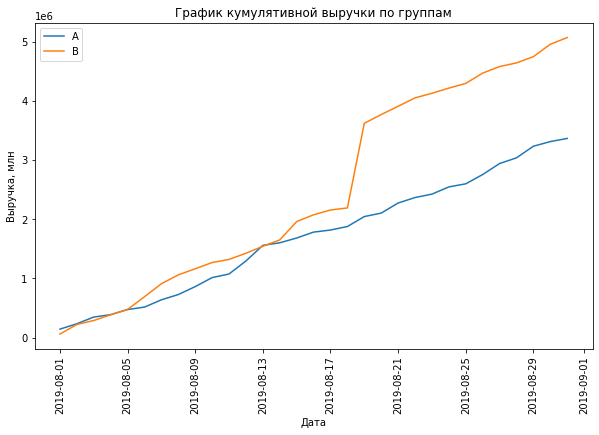

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.ylabel("Выручка, млн")
plt.legend() 
;

На протяжении всего теста группа В лидирует по кумулятивной выручке, достигнув в конце теста 6ти млн. Группа А на конец теста - около 4 млн.   
Также заметно, что группа А растёт ровно, это значит, что выручка практически не меняется от дня ко дню.
Группа В растёт скачками с большим ростом после 17го числа. На графике мы видим рост выручки группы В, причиной тому может быть повышение конверсии, или среднего чека. Возможно в середине теста изменения наконец начали давать свои плоды. Также аномальные продажи могли несколько исказить картину.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

''

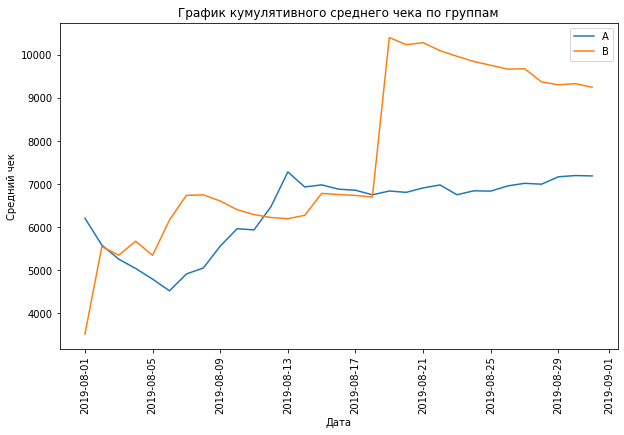

In [16]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.ylabel("Средний чек")
plt.legend() 
;

Также практически во время всего теста группа В лидирует по кумулятивному среднему чеку, и тоже с 18го августа имеется резкий рост. Возможно имеют место аномалии. Группа В предположительно имеет тенденцию к понижению, а группа А к росту или удержанию текущего уровня. 

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

''

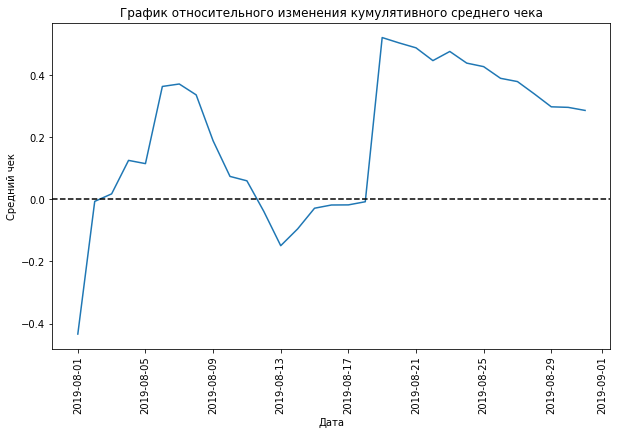

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.ylabel("Средний чек")
;

Результаты теста несколько раз значительно менялись, в середине месяца имелись отрицательные значения в пользу группы А, но всё остальное время была впереди группа В

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения

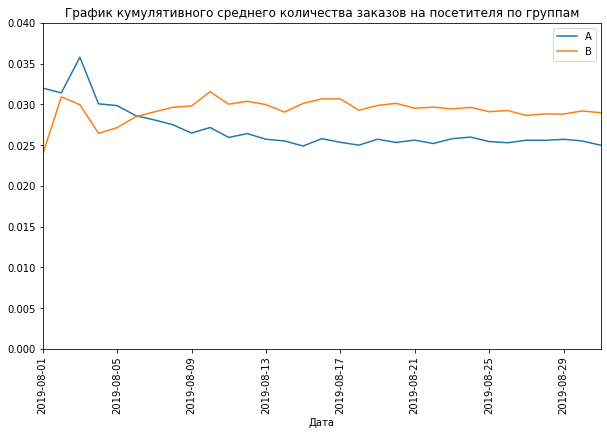

In [18]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.legend()
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.04]) ;


Сначала графики колебались, а затем выровнялись и шли практически параллельно друг другу, среднее количество заказов в группе В обогнало группу А уже до конца первой недели теста, а затем стабилизировалось. 

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

''

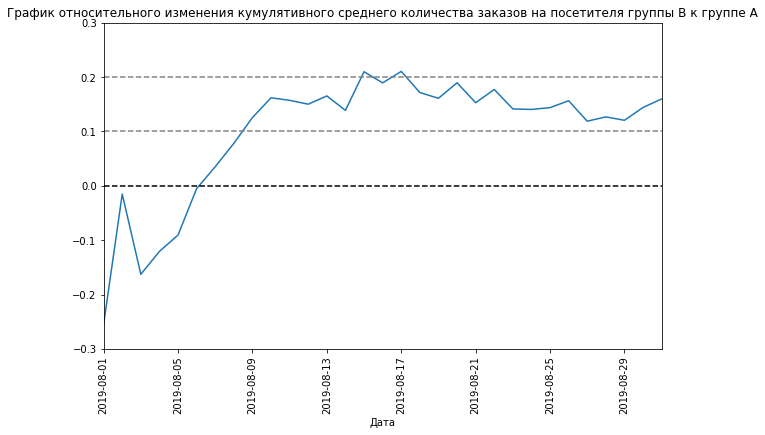

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Дата")
plt.xticks(rotation=90)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')
plt.axhline(y=0.20, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3])
;

Практически на протяжении всего теста группа В лидировала по метрике, большую часть времени превышая на 10-20 %

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

In [20]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
# выведем пользователей с самым большим количеством заказов
ordersByUsers.columns = ['visitor_id', 'transaction_count']

display(ordersByUsers.sort_values(by='transaction_count', ascending=False).head(10)) 

,visitor_id,transaction_count
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


''

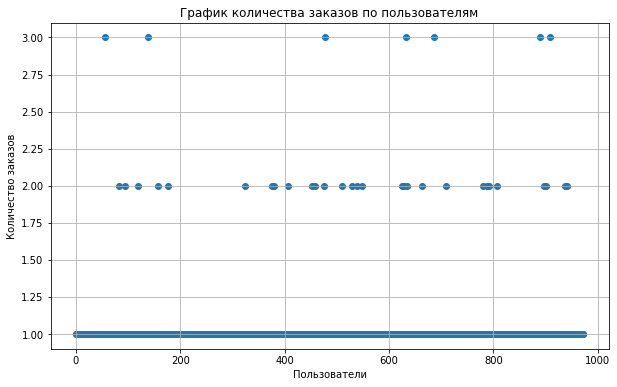

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,6))
plt.scatter(x_values, ordersByUsers['transaction_count']) 
plt.grid(True)
plt.title('График количества заказов по пользователям')
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")
;

Видим, что большинство пользователей сделало 1 заказ, есть совсем небольшое количество пользователей с двумя заказами и совсем маленькое количество с тремя. Конечно на сайте могут быть более активные покупатели, но для более реалистичного исследования мы этих пользователей далее уберем. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

In [22]:
print(np.percentile(ordersByUsers['transaction_count'], [95, 99])) 

[1. 2.]


Только 5% пользователей сделали более 1 заказа и 1% пользователей сделало более 2 заказов. Будет разумно выбрать 2 заказа за верхнюю границу и отсеять аномальных пользователей, сделавших большее количество заказов.  
Присвоим это число переменной.

In [23]:
too_many_orders = 2

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

''

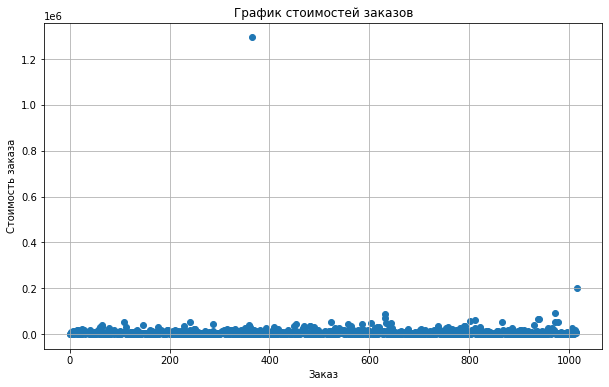

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])  
plt.grid(True)
plt.title('График стоимостей заказов')
plt.xlabel("Заказ")
plt.ylabel("Стоимость заказа")
;

Хорошо видим два аномально больших заказа, при этом все остальные лежат в интервале до приблизительно 30ти тыс. Сложно по этому графику оценить нужные границы. Ограничим значения по оси Y чтобы более детально рассмотреть большую часть заказов.

''

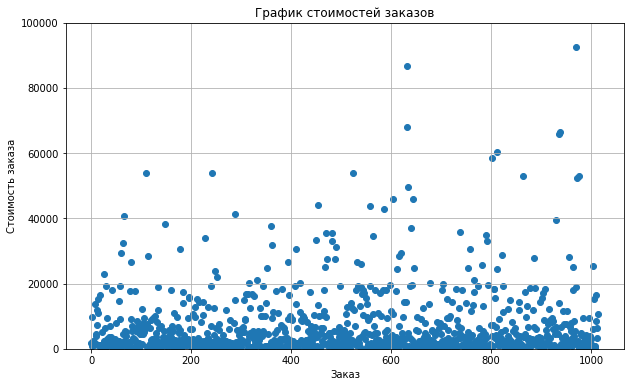

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])  
plt.grid(True)
plt.title('График стоимостей заказов')
plt.ylim(0, 100000)
plt.xlabel("Заказ")
plt.ylabel("Стоимость заказа")
;

Максимальная плотность сумм заказов лежит в интервале от 0 до 20000. Более дорогих заказов становится всё меньше, по мере возрастания сумм. Можно сказать, что почти все заказы находятся в пределах 50ти тыс. Проверим 95 и 99ый перцентили для более точного понимания границ аномалий. 

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% заказов имеют стоимость выше 26785, и не более 1% выше 53904. Выберем 99ый перцентиль верхней границей для отсеивания аномальных заказов - свыше 53904. Присвоим это число переменной.

In [27]:
too_expensive_orders = 53904

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения

Сформулируем гипотезы.  
Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная гипотеза: различия между группами есть.

Посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Применим тест Манна-Уитни.  
Уровень значимости установим на уровне 0,05 (α = 0,05) 

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


data = (
    visitorsADaily.merge(
        visitorsBDaily, left_on='date', right_on='date', how='left'
    )
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

        date  visitorsPerDateA  visitorsPerDateB
0 2019-08-01               719               713
1 2019-08-02               619               581
2 2019-08-03               507               509
3 2019-08-04               717               770
4 2019-08-05               756               707


In [29]:
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p_value:', "{0:.5f}".format(p_value))
print('Относительное различие:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p_value: 0.01102
Относительное различие: 0.160


P-value сильно меньше, чем 0,05, поэтому мы отвергаем нулевая гипотезу. Анализ 'сырых' данных говорит нам о том, что статистически значимые различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост среднего группы В к среднему группы А равен 16%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

Сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке заказа между группами нет.
Альтернативная гипотеза: различия между группами есть.
Применим тест Манна-Уитни. 
Уровень значимости установим на уровне 0,05 (α = 0,05) 

In [30]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p_value:','{0:.3f}'.format(p_value))
print('Относительное различие:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.829
Относительное различие: 0.287


P-value сильно выше, чем 0.05, поэтому мы не отвергаем нулевую гипотезу. Статистически значимой разницы в среднем чеке между группами нет. И это несмотря на то, что относительное различие между ними в 29%.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения

Вспомним, что 95-й и 99-й перцентили суммы чеков равны 26785 и 53904.  
А 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя.  
Примем за аномальных пользователей тех, кто совершил 2 и более заказов, или совершил заказ на сумму свыше 26785.

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > too_many_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > too_many_orders]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > too_expensive_orders]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64


Теперь проверим гипотезы по очищенным данным.  
Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет.  
Альтернативная гипотеза: различия между группами есть.  
Применим тест Манна-Уитни.  
Уровень значимости установим на уровне 0,05 (α = 0,05) 

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p_value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value: 0.00702
Относительное различие: 0.189


Тест на очищенных данных подтвердил более раннее исследование. P-value ниже уровня значимости и мы отвергаем нулевую гипотезу в пользу альтернативной. В относительных величинах это тоже подтверждается - группа В превысила группу А на 18%. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

In [33]:
print('p_value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value: 0.788
Относительное различие: -0.032


P-value сильно выше уровня значимости и мы не можем опровергнуть нулевую гипотезу.  
Статистической разницы между группами нет. 
По очищенным данным это подтверждается и небольшой относительной разницей меньше 5%.

### Решение по результатам теста

Мы видим, что данные по среднему чеку еще не "устаканились". 
Если нам важен этот показатель, то тест следует продолжить. Если нас больше интересует количество заказов, то тест можно прекращать, гипотеза об увеличении количества заказов на посетителя на 18 % подтвердилась. Предположу, что нам важны оба показателя. P-value среднего чека значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Не важно на сколько средний чек больше или меньше - это статистически не значимо.

Вывод: Остановить тест, зафиксировать победу группы B. После внедрения гипотезы среднее количество заказов на посетителя увеличилось на 18%, средний чек не изменился.

## Общий вывод

Была проделана большая работа. 
Была найдена наиболее подходящая гипотеза : Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Данная гипотеза будет иметь максимальный охват, повлияет на пользователей достаточно сильно, и задействует не много трудозатрат.

Далее была проведено А/В тестирование, и проанализированы результаты.  
Были загружены датафреймы. Мы проверили их на пропуски и дубликаты. Они отстутствуют.  
В тесте участвуют две группы: А и В.  
Данные были собраны в интервале 2019-08-01 - 2019-08-31.  
Были обнаружены пользователи, находящиеся сразу в обеих группах, это может испортить нам А/В тестирование и так как количество таких пользователей не велико (5,6% от общего количества), то мы их убрали из теста.   
Всего пользователей осталось в тесте: 973. 
Распределение пользователей по группам не одинаковое: 445 в группе А и 528 в группе В. Разница около 15%. Это говорит нам о том, что тест не оптимальный.  

Кумулятивные метрики по выручке, среднему чеку и количеству заказов на посетителя почти все время лидировали в группе B.  Мы выявили аномалии и исключили их. Затем подготовили выборки и посчитали статистичискую значимость изменений среднего количества заказов на посетителя и размера среднего чека с аномалиями и без. По результатам проделанной работы можно сделать вывод:
- Что есть статистически значимые различия по среднему количеству заказов на посетителя между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

Останавливаем тест, фиксируем победу группы B. После внедрения гипотезы среднее количество заказов на посетителя увеличилось на 18%, средний чек не изменился.